In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from array import array
import matplotlib as mpl

mpl.rcParams.update({'font.size': 16})

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

Ok, so what did we want to show?

    -plot occupation probability as function of time
        -I just did that first, but its mainly just using mesolve()?

    -get out Rabi Oscillations + get rabi freq
    
    -Compare energy levels with and without RWA

    -Look at Fourier Transforms(later?)

In [3]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 15              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation

tlist = np.linspace(0,25,101)

In [4]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian

Hrwa = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())

Horig = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [5]:
Horig

Quantum object: dims = [[15, 2], [15, 2]], shape = (30, 30), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.31415927  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          6.28318531  0.31415927  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.31415927  6.28318531  0.          0.          0.44428829
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0

In [6]:
output = mesolve(Horig, psi0, tlist,[], [a.dag() * a, sm.dag() * sm])
#So, what this is doing is finding the expectation values of
#This is with no dissippation

So, what the code above is doing is finding the expectation values of a.dag() * a and sm.dag() * sm, which are the occupancy of the excited state for the atom and cavity. The mesolve function is solving the Lindbladian (and I have no idea what this is) and I am setting the c_ops=[], so no dissippation?

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

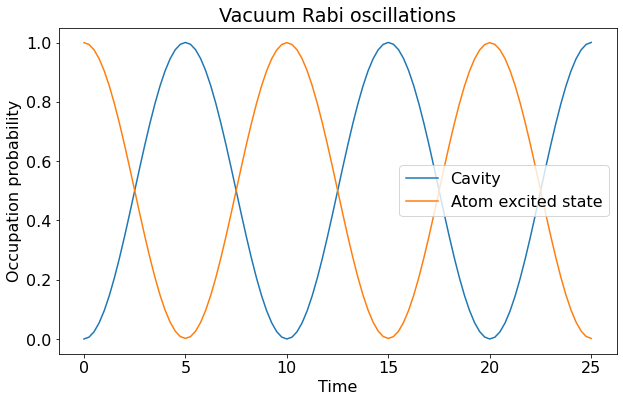

In [7]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend()
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

Lets see if theres a difference for RWA?

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

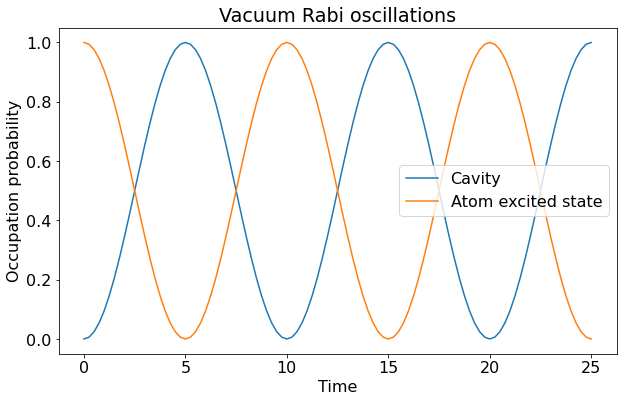

In [8]:
output = mesolve(Hrwa, psi0, tlist,[], [a.dag() * a, sm.dag() * sm])
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

Looks basically the same, what about energy levels? Want to find them as function of omega? I think you get energy values from eigenvalues, so something like evals, ekets = H.eigenstates()

In [9]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 15              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation

tlist = np.linspace(0,25,101)

In [10]:
evals,ekets=Horig.eigenstates()

In [11]:
evals #so we have 30 eigenvalues

array([-7.85889344e-03,  5.96126089e+00,  6.58938206e+00,  1.21144878e+01,
        1.30025059e+01,  1.82980462e+01,  1.93852982e+01,  2.44973215e+01,
        2.57523736e+01,  3.07066509e+01,  3.21093947e+01,  3.69231295e+01,
        3.84592664e+01,  4.31450310e+01,  4.48037151e+01,  4.93712306e+01,
        5.11438657e+01,  5.56009463e+01,  5.74804999e+01,  6.18336091e+01,
        6.38141870e+01,  6.80687891e+01,  7.01453568e+01,  7.43061538e+01,
        7.64743463e+01,  8.05458680e+01,  8.28020375e+01,  8.68443187e+01,
        8.91878173e+01,  9.43576629e+01])

In [12]:
wc = 1  # cavity frequency
wa = 1
gvec=np.linspace(0,1,50)


origlvls=[]
rwalvls=[]
for g in gvec:
    
    Hrwa = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    Horig = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
    
    evo,eko=Horig.eigenstates()
    evr,ekr=Hrwa.eigenstates()
    origlvls.append(evo)
    rwalvls.append(evr)
    

Ok, so now want to plot energy levels as func of freq:

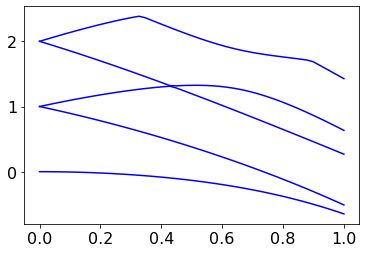

In [13]:
gvec=np.linspace(0,1,50)

n1=len(origlvls)
n2=len(origlvls[1])
elvls=np.zeros([n1,n2])
for i in range(n1):
    for j in range(len(origlvls[1])):
        elvls[i,j]=origlvls[i][j]
    
fig=plt.figure();
ax = fig.add_subplot(111)
for i in range(5):
    ax.plot(gvec,elvls[:,i],"b-")
    

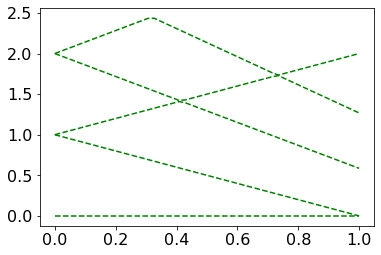

In [14]:
gvec=np.linspace(0,1,50)

n1=len(origlvls)
n2=len(origlvls[1])
erlvls=np.zeros([n1,n2])
for i in range(n1):
    for j in range(len(rwalvls[1])):
        erlvls[i,j]=rwalvls[i][j]
    
fig=plt.figure();
ax = fig.add_subplot(111)
for i in range(5):
    ax.plot(gvec,erlvls[:,i],"g--")
    

<ipython-input-15-dfd72bc579d9>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0.5, 1.0, 'Energy levels for RWA and original Hamiltonian')

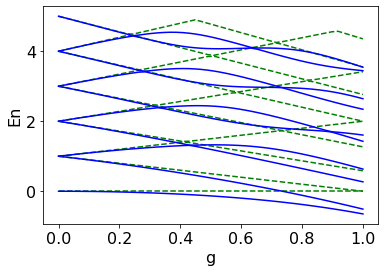

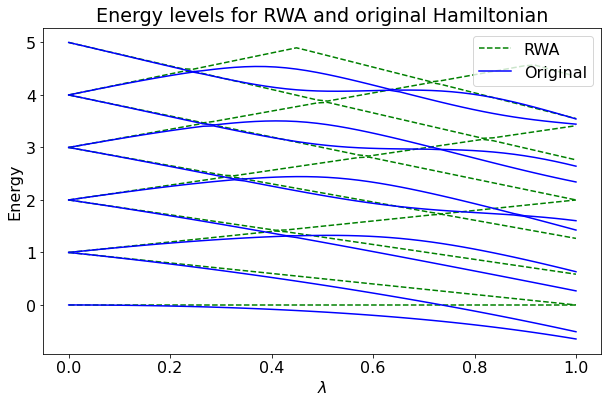

In [15]:
fig=plt.figure();
ax = fig.add_subplot(111)
for i in range(10):
    ax.plot(gvec,erlvls[:,i],"g--")
    ax.plot(gvec,elvls[:,i],"b-")
ax.set_xlabel("g")
ax.set_ylabel("En")
fig.show()

fig, axes = plt.subplots(1, 1, figsize=(10,6))

for i in range(9):
    axes.plot(gvec,erlvls[:,i],"g--")
    axes.plot(gvec,elvls[:,i],"b-")

axes.plot(gvec,erlvls[:,9],"g--",label="RWA")
axes.plot(gvec,elvls[:,9],"b-",label="Original")
axes.legend()
axes.set_xlabel('$\lambda$')
axes.set_ylabel('Energy')
axes.set_title('Energy levels for RWA and original Hamiltonian')









<ipython-input-16-46184c54851b>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


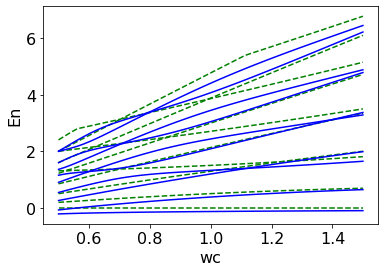

In [16]:
wc = 1  # cavity frequency
wa = 1
g=0.5

wvec=np.linspace(0.5,1.5,50)

origlvls=[]
rwalvls=[]
for wc in wvec:
    
    Hrwa = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    Horig = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
    
    evo,eko=Horig.eigenstates()
    evr,ekr=Hrwa.eigenstates()
    origlvls.append(evo)
    rwalvls.append(evr)

n1=len(origlvls)
n2=len(origlvls[1])
eolvls=np.zeros([n1,n2])
erlvls=np.zeros([n1,n2])

for i in range(n1):
    for j in range(len(rwalvls[1])):
        erlvls[i,j]=rwalvls[i][j]
        eolvls[i,j]=origlvls[i][j]



    
fig=plt.figure();
ax = fig.add_subplot(111)
for i in range(10):
    ax.plot(wvec,erlvls[:,i],"g--")
    ax.plot(wvec,eolvls[:,i],"b-")
ax.set_xlabel("wc")
ax.set_ylabel("En")
fig.show()

Text(0.5, 1.0, 'Energy levels for RWA and original Hamiltonian')

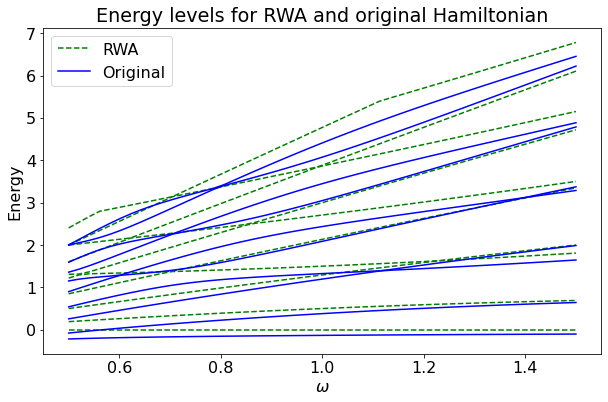

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))

for i in range(9):
    axes.plot(wvec,erlvls[:,i],"g--")
    axes.plot(wvec,eolvls[:,i],"b-")

axes.plot(wvec,erlvls[:,9],"g--",label="RWA")
axes.plot(wvec,eolvls[:,9],"b-",label="Original")
axes.legend()
axes.set_xlabel('$\omega$')
axes.set_ylabel('Energy')
axes.set_title('Energy levels for RWA and original Hamiltonian')





In [18]:
wc = 1  # cavity frequency
wa = 1
gvec=np.linspace(0,1,50)


origlvls=[]
rwalvls=[]
for g in gvec:
    
    Hrwa = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    Horig = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
    
    evo,eko=Horig.eigenstates()
    evr,ekr=Hrwa.eigenstates()
    origlvls.append(evo)
    rwalvls.append(evr)
    